# Graph showing Google Trends evolution on cryptocurrency terms

## Imports

In [1]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg

from PIL import Image

import datetime
from highlight_text import fig_text

## Retrieve data

In [2]:
bitcoin = pd.read_csv("../data/Bitcoin_Trends.csv")
blockchain = pd.read_csv("../data/Blockchain_Trends.csv")
crypto = pd.read_csv("../data/Crypto_Trends.csv")

In [4]:
for i in range(len(bitcoin)) :
    bitcoin["Mois"][i] = datetime.datetime.strptime(bitcoin['Mois'][i], "%Y-%m").strftime('%Y-%m')

<ipython-input-4-4d13642dddf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin["Mois"][i] = datetime.datetime.strptime(bitcoin['Mois'][i], "%Y-%m").strftime('%Y-%m')


In [5]:
bitcoin.tail()

,Mois,Interest
160,2021-05,62.0
161,2021-06,45.0
162,2021-07,30.0
163,2021-08,31.0
164,2021-09,31.0


In [6]:
type(bitcoin['Mois'][0])

str

## Create the plot

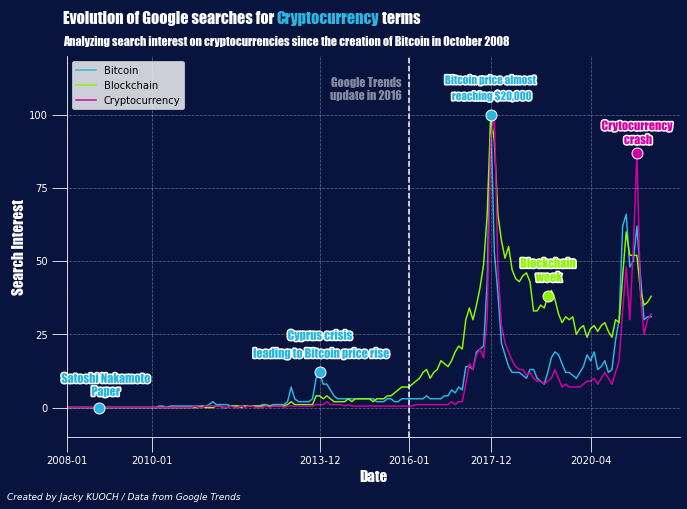

<Figure size 432x288 with 0 Axes>

In [13]:
fig,ax = plt.subplots(figsize = (11,7))

#Add grid to the plot
ax.grid(ls="dotted", lw="0.5", color="w", zorder=1)

hfont = {'fontname':'Impact'}

#Change the background color
fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

#Change the ticks color
ax.tick_params(colors="w", length=15)

#Change the axes color
ax.spines['bottom'].set_color("w")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

# Plot the three trends
plt.plot(bitcoin['Mois'], bitcoin['Interest'], zorder=0, color="#2bb6e0", label = "Bitcoin")
plt.plot(blockchain['Mois'], blockchain['Interest'], zorder=0, color="#8BF600", label = "Blockchain")
plt.plot(crypto['Mois'], crypto['Interest'], zorder=0, color="#D200A4", label = "Cryptocurrency")

# Set the ticks
plt.xticks(['2008-01', '2010-01','2013-12','2016-01','2017-12','2020-04'])
plt.yticks([0,25, 50, 75, 100])
ax.set_ylim(-10,120)
plt.xlim(xmin='2008-01')

# Axes Label
plt.xlabel("Date", color="w", fontsize=15 , **hfont)
plt.ylabel("Search Interest", color="w", fontsize=15 , **hfont)

# Title and credits
fig_text(0.12,0.97, s="Evolution of Google searches for <Cryptocurrency> terms\n", highlight_textprops=[{"color": '#2bb6e0'}], fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.12,0.9, "Analyzing search interest on cryptocurrencies since the creation of Bitcoin in October 2008", fontsize = 12, fontweight="light", color = "w", **hfont)
fig.text(0.05, 0, "Created by Jacky KUOCH / Data from Google Trends",fontstyle="italic",fontsize=9, color="w")


# Split the graph in two
ax.axvline(x='2016-01', color="w", linestyle = '--')

# Google Trends update 
ax.text('2015-01', 105, "Google Trends\nupdate in 2016", fontsize=12, ha="center", color="w",alpha = 0.5 , **hfont)

# Add points on key dates

## Satoshi Nakamoto paper
ax.scatter('2008-10', bitcoin.loc[bitcoin['Mois'] == "2008-11", "Interest"], s=120, color="#2bb6e0", edgecolors="w", lw=1, zorder=3 )
satoshipaper = ax.text('2008-12', 4, "Satoshi Nakamoto\nPaper", fontsize=12, ha="center", color="#2bb6e0", **hfont)
satoshipaper.set_path_effects([path_effects.withStroke(linewidth=3, foreground="w")])

## Cyprus banking crisis
ax.scatter('2013-12', bitcoin.loc[bitcoin['Mois'] == "2013-12", "Interest"], s=120, color="#2bb6e0", edgecolors="w", lw=1, zorder=3 )
cypruscrysis = ax.text('2013-12', 17, "Cyprus crisis\n leading to Bitcoin price rise", linespacing =1.7 , fontsize=12, ha="center", color="#2bb6e0", **hfont)
cypruscrysis.set_path_effects([path_effects.withStroke(linewidth=3, foreground="w")])

## Bitcoin almost reaching $20,000
ax.scatter('2017-12', bitcoin.loc[bitcoin['Mois'] == "2017-12", "Interest"], s=120, color="#2bb6e0", edgecolors="w", lw=1, zorder=3 )
bitcoin2000 = ax.text('2017-12', 105, "Bitcoin price almost\n reaching $20,000", linespacing =1.7 , fontsize=11, ha="center", color="#2bb6e0", **hfont)
bitcoin2000.set_path_effects([path_effects.withStroke(linewidth=3, foreground="w")])

## Blockchain Week
ax.scatter('2019-04', blockchain.loc[blockchain['Mois'] == "2019-04", "Interest"], s=120, color="#8BF600", edgecolors="w", lw=1, zorder=3 )
bcweek = ax.text('2019-04', 43, "Blockchain\n week", linespacing =1.3, fontsize=12, ha="center", color="#8BF600", **hfont)
bcweek.set_path_effects([path_effects.withStroke(linewidth=3, foreground="w")])

## Cryptocurrency Crash
ax.scatter('2021-05', crypto.loc[crypto['Mois'] == "2021-05", "Interest"], s=120, color="#D200A4", edgecolors="w", lw=1, zorder=3 )
cryptocrash = ax.text('2021-05', 90, "Crytocurrency\n crash", linespacing =1.3, fontsize=12, ha="center", color="#D200A4", **hfont)
cryptocrash.set_path_effects([path_effects.withStroke(linewidth=3, foreground="w")])

plt.legend(loc='upper left')

plt.show()
plt.tight_layout()
